# 1. install

In [1]:
# visualization을 위한 helper code입니다.
if 'google.colab' in str(get_ipython()):
    print('Downloading plot_helpers.py to util/ (only neded for colab')
    !mkdir util; wget https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py -P util

--2021-08-09 03:49:08--  https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8787 (8.6K) [text/plain]
Saving to: ‘util/plot_helpers.py’

plot_helpers.py     100%[===================>]   8.58K  --.-KB/s    in 0s      

2021-08-09 03:49:09 (79.9 MB/s) - ‘util/plot_helpers.py’ saved [8787/8787]



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
from util.plot_helpers import plot_vec, plot_vecs, autoscale_arrows

sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# 2. Matrix Operations 

In [18]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])
print(A, B, sep='\n')

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [16]:
# elementwise Product 
'''
a11 = 1 * 5 
a12 = 2 * 6
a21 = 3 * 7 
a22 = 4 * 8 
'''
A * B 

array([[ 5, 12],
       [21, 32]])

In [17]:
# matrix Product 
'''
a11 = 1*5 + 2*7
a12 = 1*6 + 2*8
a21 = 3*5 + 4*7
a22 = 3*6 + 4*8
'''
A @ B 

array([[19, 22],
       [43, 50]])

Matrix multiplication은 교환법칙이 성립하지 않습니다 ( 𝐴𝐵≠𝐵𝐴 ). 

아래 sympy는  𝑥1 ,  𝑥2  등의 기호(symbol)을 사용하게 해주는 라이브러리입니다.

In [23]:
import sympy as sy 

A = sy.Matrix([[3, 4],[7, 8]])
B = sy.Matrix([[5, 3],[2, 1]])
print(A, B, sep='\n')

Matrix([[3, 4], [7, 8]])
Matrix([[5, 3], [2, 1]])


In [26]:
A@B

⎡23  13⎤
⎢      ⎥
⎣51  29⎦

In [27]:
B@A

⎡36  44⎤
⎢      ⎥
⎣13  16⎦

In [41]:
A@B == B@A

False

하지만 vector multiplication은 교환법칙이 성립합니다 ( 𝑥𝑇𝑦=𝑦𝑇𝑥 ).

In [31]:
x1, x2, y1, y2 = sy.symbols('x1, x2, y1, y2', real = True) # 각 변수 기호 사용

x = sy.Matrix([x1, x2])
y = sy.Matrix([y1, y2])

x, y 

⎛⎡x₁⎤  ⎡y₁⎤⎞
⎜⎢  ⎥, ⎢  ⎥⎟
⎝⎣x₂⎦  ⎣y₂⎦⎠

In [32]:
x.T @ y 

[x₁⋅y₁ + x₂⋅y₂]

In [33]:
y.T @ x 

[x₁⋅y₁ + x₂⋅y₂]

In [40]:
x.T @ y == y.T @ x 

True

> Matrix transpose는 Matrix $A,B$, 그리고 constant $c$에 대해 다음 식들을 만족합니다.

1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

4번이 성립하는지 실제로 알아봅시다.


In [35]:
a, b, c, d, e, f, g, h, i, j, k, l = sy.symbols('a, b, c, d, e, f, g, h, i, j, k, l', real = True)
A = sy.Matrix([[a, b],[c, d],[e, f]])
B = sy.Matrix([[g, h, i],[j, k, l]])

A, B 

⎛⎡a  b⎤           ⎞
⎜⎢    ⎥  ⎡g  h  i⎤⎟
⎜⎢c  d⎥, ⎢       ⎥⎟
⎜⎢    ⎥  ⎣j  k  l⎦⎟
⎝⎣e  f⎦           ⎠

In [43]:
AB = A@B 
AB_tr = AB.transpose()
AB_tr

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [44]:
B_tr_A_tr = B.transpose() @ A.transpose()
B_tr_A_tr

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [45]:
AB_tr == B_tr_A_tr

True

# 3. Linear System


### n=2일 때의 linear system
> 다음과 같은 예시를 생각해 봅시다.



$$ x_1 + x_2 = 6 \\
x_1 - x_2 = -4 $$. 

> 두 linear equation을 plot한다면

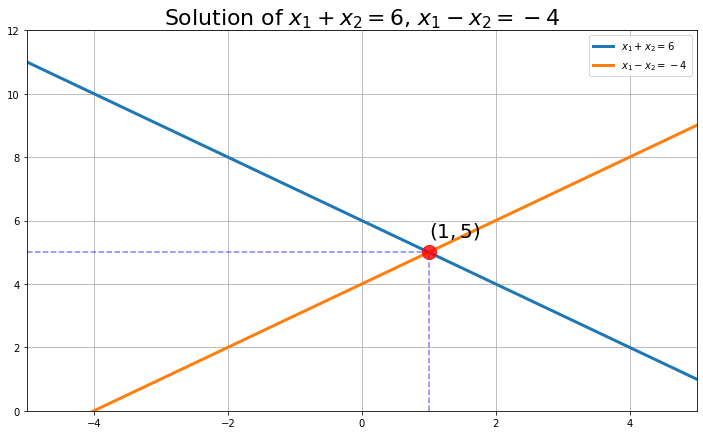

In [56]:
# n=2일때 
x1 = np.linspace(-5, 5, 100) # 이건 뭐지? n=2일때, 한개만 해주네?  공간 그려주는거 같은데.. 

# 위에 식을 처리해줌 
x2_1 = -x1+6 
x2_2 = x1+4 

fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(1,5,s=200, zorder=5, color='r', alpha=.8) # 교점표시

ax.plot(x1, x2_1, lw=3, label='$x_1+x_2=6$') # 파란색선 
ax.plot(x1, x2_2, lw=3, label='$x_1-x_2=-4$') #주황색선

ax.plot([1,1], [0,5], ls='--', color='b', alpha=.5) # 마주하는점 x좌표 점선 표시 
ax.plot([-5,1], [5,5], ls ='--', color='b', alpha=.5)

ax.set_xlim([-5,5])
ax.set_ylim([0,12])

ax.legend()
s = '$(1,5)$' #이 점을 구하는 방법은 없나? 직접 표기말고 
ax.text(1, 5.5, s, fontsize=20)
ax.set_title('Solution of $x_1+x_2=6$, $x_1-x_2=-4$', size = 22)
ax.grid()

Q. 식 표현할때 
- x2_1 = -x1_6 
- '$x_1+x_2=6$'


- lw 옵션 ? 
- 위에 내용에서 두 식에 대한 교점으로 구하는 부분?이 어디인거지? 

### n=3일 때의 linear system
> 다음과 같은 예시를 생각해 봅시다.

$$ x_1 + 2x_2 + 3x_3 = 6 \\
2x_1 + 5x_2 + 2x_3 = 4 \\
6x_1 - 3x_2 + x_3 = 2 $$. 

> 세 linear equation을 plot한다면

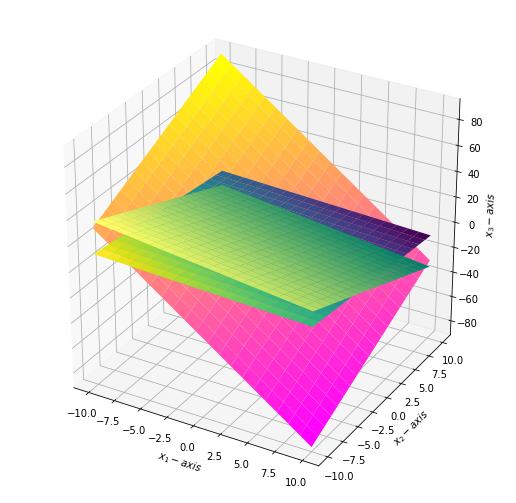

In [65]:
# n=3 일때 
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

# 이번에는 fig, ax를 따로해주네?
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

#x3으로 정한 이유는? 대문자로 써야해? 
X3_1 = (6 - 2*X2 - X1) * (1/3)
X3_2 = (4 - 5*X2 - 2*X1) * (1/2)
X3_3 = 2  + 3*X2 - 6*X1

ax.plot_surface(X1, X2, X3_1, cmap ='viridis', alpha = 1) 
ax.plot_surface(X1, X2, X3_2, cmap ='summer', alpha = 1)
ax.plot_surface(X1, X2, X3_3, cmap ='spring', alpha = 1)

ax.set_xlabel('$x_1-axis$')
ax.set_ylabel('$x_2-axis$')
ax.set_zlabel('$x_3-axis$')

plt.show()



> 이 나오게 됩니다. 따라서 n=2인 첫 번째 예시와 마찬가지로, 세 평면이 만나는 교점을 찾으면 주어진 세 linear equation을 만족하는 해가 됩니다. n=2일 경우보다 그림을 보고 직관적으로 해를 알기 어렵고, 연립방정식으로 해를 구하는 것도 상대적으로 복잡해졌음을 알 수 있습니다.

> 주어진 예시들은

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 2 & 3\\
2 & 5 & 2\\
6 & -3 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
6\\
4\\
2
\end{bmatrix} $$

> 의 꼴로 생각할 수 있는데, 위의 두 plot은 이를 "row" (linear equation)를 중심으로 이들의 교점을 구하는 방식으로 접근했습니다. 이 방식과는 다르게, "column"들을 중심으로 생각해봅시다. 각 column을 vector로 생각하면 위 linear system은

$$ x_1\begin{bmatrix}
1\\
2\\
6
\end{bmatrix} + x_2\begin{bmatrix}
2\\
5\\
-3
\end{bmatrix} + x_3\begin{bmatrix}
3\\
2\\
1
\end{bmatrix} =  \begin{bmatrix}
6\\
4\\
2
\end{bmatrix}$$ 

> 로 분해할 수 있습니다 (Matrix multiplications as column combinations). 즉 이 경우 $x_1, x_2, x_3$은 각 column vector의 계수가 됩니다. 이를 plot한다면

Column Vector : Matrix([[1], [2], [6]]) Matrix([[2], [5], [-3]]) Matrix([[3], [2], [1]])


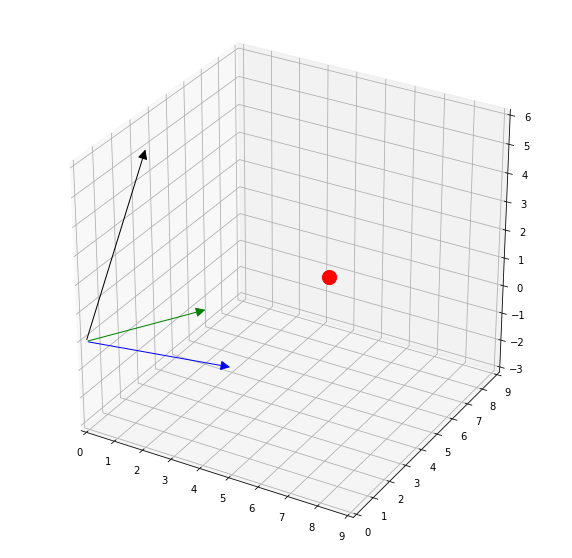

In [76]:
A = sy.Matrix([[1, 2, 3], [2, 5, 2], [6, -3, 1]]) # 
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1, x2, x3])
# A랑 x랑 연관짓는 부분 필요하지 않나? 단순히 표시하기 위함인가? 위에 x는? 

print('Column Vector :', A.col(0), A.col(1), A.col(2))

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d') # 111의미가 무엇? 
ax.scatter(6, 4, 2, s=200, color = 'red') # 이 점의 의미는? 해? 

plot_vecs(A.col(0), A.col(1), A.col(2)) # 벡터로 표시 
autoscale_arrows() # 화살표로 표시 


> 위와 같이 나오게 됩니다. 즉, 세 column vector ([1,2,6], [3,2,1],[2,5,-3])를 linear combination 해서 b ([6,4,2]) 를 만드는 계수 $x_1,x_2,x_3$을 찾는 문제로 바뀌게 됩니다.

*   Row picture: 각 row (linear equation; $a_{i1}x_{1}+a_{i2}x_{2}+a_{i3}x_{3}+\cdots +a_{in}x_{n}=b_{i}$) 들의 교점을 찾는다.
*   Column picture: 각 column (vector; $[a_{1i}, a_{2i}, \cdots, a_{mi}]^T$) 들의 linear combination이 b가 되도록 하는 계수 $x_1, x_2, x_3$을 찾는다.

> 오늘 강의에서 $Ax=b$의 해를 찾는 방법을 자세히 배우지는 않았지만, 위 예시의 경우 우연히도 2*[3,2,1] = [6,4,2]이기 때문에, 해가 $[x_1, x_2, x_3] = [0,0,2]$임을 쉽게 알 수 있습니다. sympy를 사용해서 위 $x$가 해가 맞는지 확인해봅시다.



In [95]:
from sympy.solvers.solveset import linsolve 
# linsolve 함수로해를 구하기 

x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix(((1,2,3),(2,5,2),(6,-3,1))) # []괄호가 아니고 ()로 표시한 이유가 있을까? 
b = sy.Matrix((6,4,2)) 

system = A, b # system을 이와같이 정의
print(linsolve(system, x1, x2, x3)) # system과 x1, x2, x3 원소를 차례로 넣음
A.det

FiniteSet((0, 0, 2))


<bound method MatrixDeterminant.det of Matrix([
[1,  2, 3],
[2,  5, 2],
[6, -3, 1]])>

>$x$의 해가 [0,0,2]가 맞음을 sympy로도 확인할 수 있습니다.이처럼, 앞으로 배우게 될 강의에서도 주로 column picture의 관점에서 문제들을 생각하게 될 것입니다.


### 해가 없는 경우의 linear system
> 위의 두 예시는 해가 1개만 존재하는 linear system 이었습니다. 오늘 강의에서 배웠듯, $A$의 inverse가 존재하기 때문에, 해 $x$는 unique하게 한 개만 존재하는 경우입니다. 이젠 다음과 같은 예시를 생각해 봅시다.

$$ x_1 + x_2 + x_3 = 1 \\
x_1 - x_2 - 2x_3 = 2 \\
2x_1 - x_3 = 1 $$. 

> 위 system을 행렬로 표현해보면

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 1 & 1\\
1 & -1 & -2\\
2 & 0 & -1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
1\\
2\\
1
\end{bmatrix} $$

> 이 됩니다. 이를 column picture로 plot해 본다면

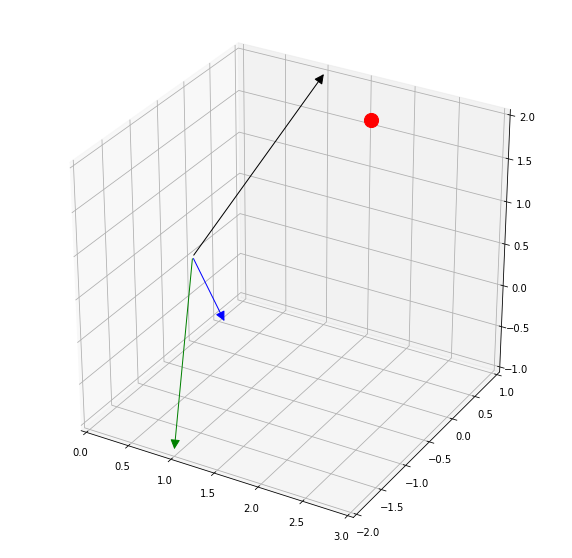

In [84]:
A = sy.Matrix([[1,1,1],[1,-1,-2],[2,0,-1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

A, x

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d') # 3차원 
ax.scatter(1,2,1,s=200,color='red') # (1,2,1) 어떻게 나온거? 

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

> 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않습니다. A의 해를 확인해 봅시다.

In [85]:
x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix([[1,1,1],[1,-1,-2],[2,0,-1]])
b = sy.Matrix([1,2,1])

system = A,b
linsolve(system, x1, x2, x3)

> 해가 없음을 알 수 있습니다. 만약 $A$가 invertible 하다면 (즉 A의 determinant가 0이라면), 해 $x$는 반드시 존재하며, 1개로 unique하게 얻어져야 합니다. 따라서, 이 경우엔 해가 없기 때문에, *det A* 가 0이 되는지 확인해봅시다.

In [86]:
A.det()

### 해가 없는 경우의 linear system
> 위의 두 예시는 해가 1개만 존재하는 linear system 이었습니다. 오늘 강의에서 배웠듯, $A$의 inverse가 존재하기 때문에, 해 $x$는 unique하게 한 개만 존재하는 경우입니다. 이젠 다음과 같은 예시를 생각해 봅시다.

$$ x_1 + x_2 + x_3 = 1 \\
x_1 - x_2 - 2x_3 = 2 \\
2x_1 - x_3 = 1 $$. 

> 위 system을 행렬로 표현해보면

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 1 & 1\\
1 & -1 & -2\\
2 & 0 & -1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
1\\
2\\
1
\end{bmatrix} $$

> 이 됩니다. 이를 column picture로 plot해 본다면

아래 코드랑 위에 A행령 내용이 조금 다르네, 아래 코드기준으로 하게되면 수정필요할듯 우선 코드 진행 먼저 ㄲ 하자 

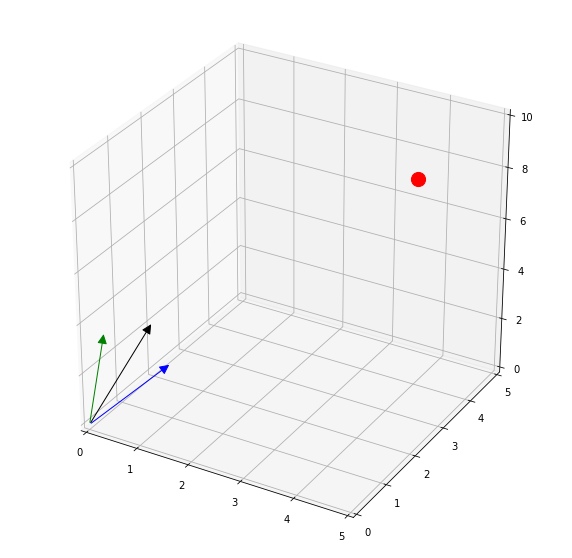

In [88]:
A = sy.Matrix([[0,1,-1],[2,1,2],[2,2,1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1, x2, x3])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

plot_vecs(A.col(0),A.col(1),A.col(2))
autoscale_arrows()

ax.scatter(4,4,8, s=200, color='red')
ax.set(xlim=[0.,5.], ylim=[0.,5.,], zlim=[0.,10.]) # x,y,z  범주지정? 

plt.show()

> 이 됩니다. 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않습니다. A의 해를 확인해봅시다.

In [90]:
A = sy.Matrix([[0,1,-1],[2,1,2],[2,2,1]])
b = sy.Matrix([4,4,8])
system = A,b
linsolve(system, x1, x2, x3)

> 위 결과가 의미하는 것은, 어떤 $x_3$의 값에 대해서도 위와 같은 형태의 vector는 해가 된다는 것입니다. 즉 ..., (-3/2, 5, 1) ($x_3$이 1일 경우), (-3, 6, 2) ($x_3$이 2일 경우), ..., (-3n/2, n+4, n), ... 모두가 해가 될 수 있다는 것이므로, 해가 무수히 많이 존재하는 경우입니다. 이때도 마찬가지로 해 $x$가 unique하게 결정되지 않는 case이므로, A의 determinant가 0인지 확인해봅시다.

In [91]:
A.det()

### Exercise

다음 linear system들의 (i) 해가 무수히 많이 존재하는 경우, (ii) 해가 한 개 존재하는 경우, (iii) 해가 존재하지 않는 경우로 나누고 존재할 경우 해를 구하시오. 또한 각각에 대해 A의 inverse가 존재하는지 설명하시오. (Hint: 위 예시의 linsolve 함수를 사용)


$ Ax = b $ \\
(a) $ \begin{bmatrix}
0 & 1 & 4\\
1 & 3 & 5\\
3 & 7 & 7
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
-5\\
-2\\
6
\end{bmatrix} $ \\
(b) $ \begin{bmatrix}
1 & 0 & -3\\
2 & 2 & 9\\
0 & 1 & 5
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
8\\
7\\
-2
\end{bmatrix} $ \\
(c) $ \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 9\\
9 & 12 & 21
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
5\\
2\\
9
\end{bmatrix} $



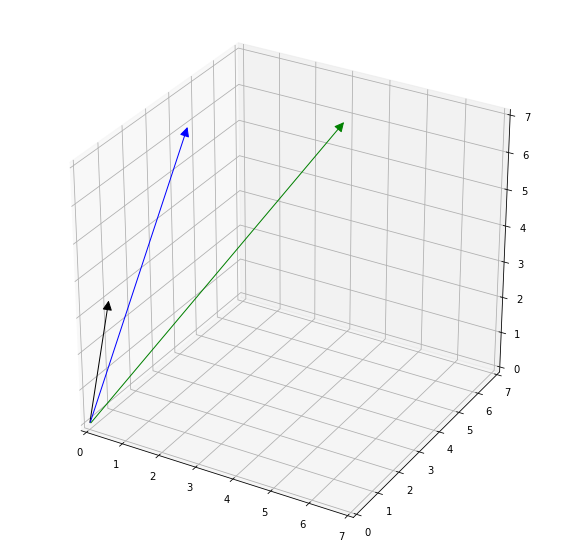

In [98]:
# (a) ==> 해가 없는 경우 
A = sy.Matrix([[0,1,4],[1,3,5],[3,7,7,]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1, x2, x3])

A.det() # 0, 해가없거나 무수히 많은 경우 
b = sy.Matrix([-5, -2, 6])
system = A,b
linsolve(system, x1, x2, x3) # 0 , 해가 없는 경우 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

# scatter 값을 뭐로 해야하는거지?? 

(b) $ \begin{bmatrix}
1 & 0 & -3\\
2 & 2 & 9\\
0 & 1 & 5
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
8\\
7\\
-2
\end{bmatrix} $ \\

FiniteSet((5, 3, -1))


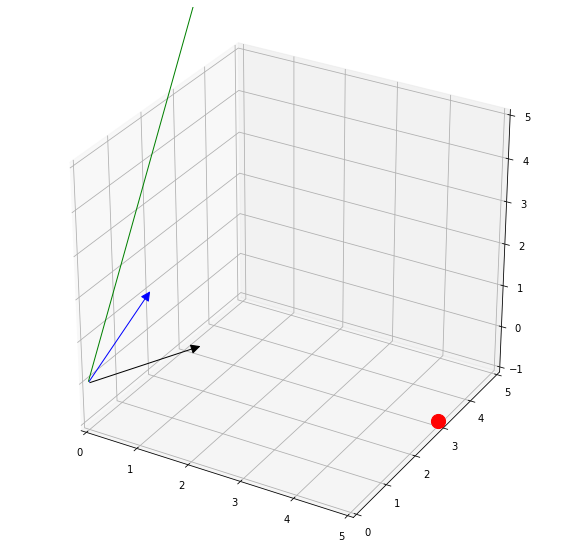

In [118]:
# (b) ==> 해가 1개 존재하는 경우 
A = sy.Matrix([[1,0,-3],[2,2,9],[0,1,5]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1, x2, x3])

A, x
A.det # 값있음 ==> 해 있는 경우 
b = sy.Matrix([8,7,-2])
system = A,b
print(linsolve(system, x1, x2, x3)) # {(5, 3, −1)} 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows() 

ax.scatter(5, 3, -1, s=200, color='red')
ax.set(xlim=[0.,5.], ylim=[0.,5.], zlim=[-1,5])

plt.show() # 이게 맞나?? 

(c) $ \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 9\\
9 & 12 & 21
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
5\\
2\\
9
\end{bmatrix} $

FiniteSet((-x3 - 7, 6 - x3, x3))


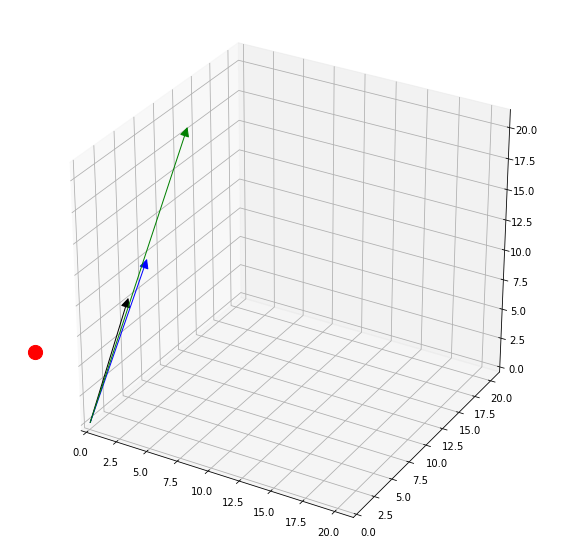

In [138]:
# (c) ==> 해가 무수히 많은 경우 
A = sy.Matrix([[1,2,3],[4,5,9],[9,12,21]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2, x3])

A.det() # 0, 해가 없거나 무수히 많은경우 

b = sy.Matrix([5,2,9])
system = A,b
print(linsolve(system, x1, x2, x3)) # 해가 무수히 많은 경우 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

plot_vecs(A.col(0),A.col(1),A.col(2))
autoscale_arrows()

ax.scatter(-8,5,1,s=200,color='red')
# ax.set(xlim=[-10,10], ylim=[0,10], zlim=[0,0])
plt.show()

# 4. Inverse matrix

> Square matrix $A$의 역행렬 $A^{-1}$은 다음과 같이 정의됩니다.

$$ A^{-1}A = AA^{-1} = I_n$$

> 역행렬이 존재한다는 의미는, input vector $x$와 output vector $Ax$ 사이에 일대일대응 관계가 성립한다는 의미입니다.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/225px-Bijection.svg.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>


> 즉, $Ax$로부터 $x$를 복원할 수 있다는 말이고, 이를 복원하는 행렬이 $A^{-1}$이 됩니다. 

> 만약 $n \times n$ 행렬 $A$의 역행렬이 존재한다면, $Ax = b$는 $x = A^{-1}b$로 해를 구할 수 있습니다.

In [136]:
A = np.array([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
B = np.array([6,4,2])

A_inv = np.linalg.inv(A)  # np.linalg.inv를 활용하면 A의 inverse를 구할 수 있습니다
A_inv_b = A_inv @ b  # A^{-1}b
x = A_inv_b  # x = A^{-1}b
print(x) 

# 검산해봅시다 (구한 x를 대입)
print(A*x) # A A^{-1}b ==> b  
print(b) 

# A*b == b 이걸로하면 왜 False임? 

Matrix([[0.857142857142857], [-0.675324675324675], [1.83116883116883]])
Matrix([[5.00000000000000], [2.00000000000000], [9.00000000000000]])
Matrix([[5], [2], [9]])


# 5. Linear combination

두 vector $ \begin{bmatrix} 4 \\ 2 \end{bmatrix}   $, $ \begin{bmatrix} -2 \\ 2 \end{bmatrix} $의 linear combination은 다음과 같이 나타낼 수 있습니다.

$$ c_1\begin{bmatrix} 4 \\ 2 \end{bmatrix} + c_2\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

이를 plot해 봅시다. 

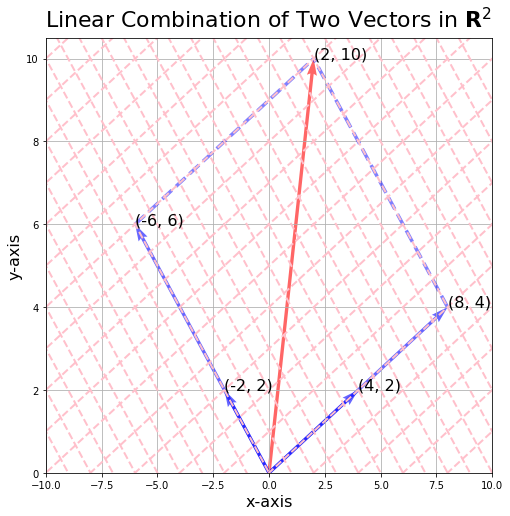

In [137]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

# tail이 origin, head가 (4,2), (-2,2), (2,10), (8,4), (-6,6)인 vector plot
for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# tail이 (8,4), head가 (2,10)인 vector plot
points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

# tail이 (-6,6), head가 (2,10)인 vector plot
points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

# 붉은색 격자 plot
for i in a:    
    y1 = i + 0.5*x  # 0.5(기울기) = 2/4
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x  # -1(기울기) = 2/(-2)
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

> 위의 그림은 두 벡터의 linear combination으로 $ \begin{bmatrix} 2 \\ 10 \end{bmatrix}$을 만드는 그립입니다. 

$$ \begin{bmatrix} 2 \\ 10 \end{bmatrix} =  2\begin{bmatrix} 4 \\ 2 \end{bmatrix} + 3\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

> $\begin{bmatrix} 4 \\ 2 \end{bmatrix}$에 3을 곱하고, $\begin{bmatrix} -2 \\ 2 \end{bmatrix}$에 2를 곱한 뒤 더하면 $\begin{bmatrix} 2 \\ 10 \end{bmatrix}$이 나옴을 알 수 있습니다. 붉은 격자는 두 벡터의 linear combination으로 도달할 수 있는 공간을 의미합니다. 그림에서 해당 붉은 격자가 $R^2$ 전체를 커버함을 확인할 수 있습니다.